In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = 'img/Jang.png'
image = cv2.imread(image_path)

In [7]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

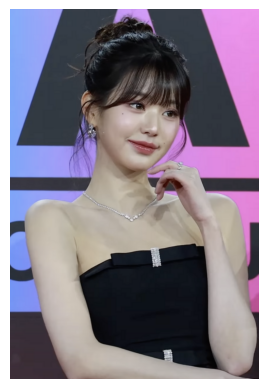

In [9]:
plt.imshow(image_rgb)
plt.axis('off')  # Pas d'axes
plt.show()

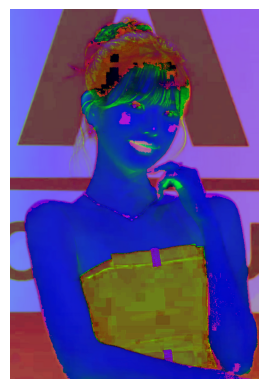

In [10]:
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

plt.imshow(image_hsv)
plt.axis('off')
plt.show()
         

In [12]:
from sklearn.cluster import KMeans
# Aplatir l'image HSV pour la transformer en une liste de pixels
#HSV 이미지를 픽셀 목록으로 바꿉니다.
pixels = image_hsv.reshape((-1,3))



[[110 121 249]
 [110 121 249]
 [110 120 249]
 ...
 [168  98  13]
 [165 109  14]
 [165 113  18]]


In [25]:
# Appliquer K-Means pour trouver les couleurs dominantes
#지배적인 색상을 찾으려면 K- Means 적용
kmeans = KMeans(n_clusters=50,n_init='auto') # On choisit 3 couleurs dominantes |세가지 주요 색상을 선택합니다.
kmeans.fit(pixels)

KMeans(n_clusters=50, n_init='auto')

In [26]:
# Obtenir les centres des clusters (les couleurs dominantes)
dominant_colors = kmeans.cluster_centers_
# Convertir les centres des clusters de HSV à RGB pour l'affichage
dominant_colors_rgb = np.uint8(dominant_colors)
# Afficher les couleurs dominantes
plt.imshow([dominant_colors_rgb])
plt.axis('off')
plt.show()

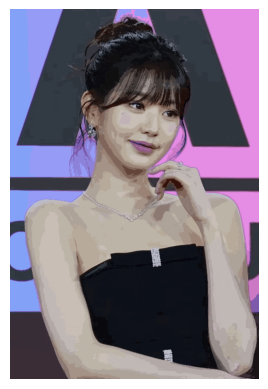

In [27]:
# Prédire à quel cluster appartient chaque pixel
labels = kmeans.predict(pixels)

# Remplacer chaque pixel par la couleur dominante de son cluster
segmented_image = dominant_colors[labels]

# Reshaper l'image segmentée pour qu'elle ait la même forme que l'image d'origine
segmented_image = segmented_image.reshape(image_hsv.shape)

# Convertir l'image segmentée de HSV à RGB pour l'affichage
segmented_image_rgb = cv2.cvtColor(np.uint8(segmented_image), cv2.COLOR_HSV2RGB)

# Afficher l'image segmentée
plt.imshow(segmented_image_rgb)
plt.axis('off')
plt.show()


C:\Users\Ponss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


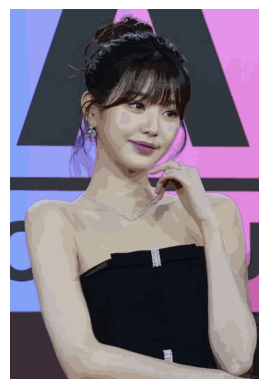

In [28]:
# Appliquer K-Means++ pour trouver les couleurs dominantes
kmeans = KMeans(n_clusters=50, init='k-means++', random_state=42)
kmeans.fit(pixels)

# Obtenir les centres des clusters (les couleurs dominantes)
dominant_colors = kmeans.cluster_centers_

# Prédire à quel cluster appartient chaque pixel
labels = kmeans.predict(pixels)

# Remplacer chaque pixel par la couleur dominante de son cluster
segmented_image = dominant_colors[labels]

# Reshaper l'image segmentée pour qu'elle ait la même forme que l'image d'origine
segmented_image = segmented_image.reshape(image_hsv.shape)

# Convertir l'image segmentée de HSV à RGB pour l'affichage
segmented_image_rgb = cv2.cvtColor(np.uint8(segmented_image), cv2.COLOR_HSV2RGB)

# Afficher l'image segmentée
plt.imshow(segmented_image_rgb)
plt.axis('off')
plt.show()
